## Final Project Submission

Please fill out:
* Student name: Peter Kimani
* Student pace: full time
* Instructor name: Mwikali



# Analysis of Aircraft incidents and crashes from 1962-2023
 Our Company is expanding into the aviation industry. In this notebook we will explore a file containing data from NTSB: Aviation_Data. This file contains logs of varying aircraft incidents and crashes from the year 1962 to 2023. Using this data we will assess the risk and determine the viability of several aircraft based on the findings

In [168]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Understanding

### Open Aviation_data.csv and have a look at the Data

In [169]:
df = pd.read_csv('data/Aviation_data.csv')  # Reads Aviation_data and copies it to variable df

print(df.shape)
df                                 # Displays first and last 5 rows

(90348, 31)


C:\Users\Peter Kimani\AppData\Local\Temp\ipykernel_11968\2119656362.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Aviation_data.csv')  # Reads Aviation_data and copies it to variable df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### Display all the columns to have the range of the data

In [170]:
df.columns 


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [171]:
df.info() #display the type of data in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

### Explore some Columns and the unique values

In [152]:
df['Purpose.of.flight'].value_counts() 

Purpose.of.flight
Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

In [153]:
df['Aircraft.Category'].value_counts()


Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [154]:
#display injury severity as a percentage for better context
df['Injury.Severity'].value_counts(normalize=True)*100 

Injury.Severity
Non-Fatal     76.638715
Fatal(1)       7.016805
Fatal          5.987097
Fatal(2)       4.222371
Incident       2.524776
                ...    
Fatal(270)     0.001138
Fatal(60)      0.001138
Fatal(43)      0.001138
Fatal(143)     0.001138
Fatal(230)     0.001138
Name: proportion, Length: 109, dtype: float64

#### Combine Make and Model to differenciate models from the same manufacturer

In [155]:
#new series to investigate which make and model has the most accidents
make_model = df['Make'] + ' ' +  df['Model'] 
make_model.value_counts()

Cessna 152               2168
Cessna 172               1254
Cessna 172N               996
Piper PA-28-140           812
Cessna 150                716
                         ... 
Learjet 55B                 1
Weber CA-65                 1
Parkman VARI-EZE            1
Casa C-212                  1
ROYSE RALPH L GLASAIR       1
Name: count, Length: 20130, dtype: int64

## Data Cleaning

### Delete the columns with the most missing values that are not useful in the assessment

This displays the columns with the most missing values

In [156]:
df.isna().sum().sort_values(ascending = False) #shows the total number of missing values per column


Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40216
Airport.Name              37644
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8555
Report.Status              7843
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2841
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
Investigation.Type            0
dtype: i

Drop columns with numerous missing rows and those that are not relevant

In [157]:
#using new dataframe to have a reference point at this stage
df_clean = df.drop(['Schedule','Air.carrier','FAR.Description','Longitude','Accident.Number',
'Latitude','Airport.Code','Airport.Name','Registration.Number','Amateur.Built','Injury.Severity'],axis=1)

df_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

I have purposefully left Aircraft Category as it may be relevant in discerning the types of aircraft further on

In [158]:
df_clean.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Destroyed,NaN,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Delete duplicates

Identify and drop the duplicated rows in the dataframe

In [159]:
df_clean.duplicated().sort_values(ascending=False)


75197     True
83009     True
77091     True
87616     True
82998     True
         ...  
30122    False
30121    False
30120    False
30119    False
90347    False
Length: 90348, dtype: bool

In [160]:
df_clean = df_clean.drop_duplicates(keep='first',ignore_index=True)

### Dealing with wrong formats

These columns have a combination of formats, which would affect any visualizations in future


In [161]:
df_clean['Make'] = df_clean['Make'].str.title()

In [162]:
df_clean['Location'] = df_clean['Location'].str.upper()

In [163]:
df_clean['Location'].value_counts()


Location
ANCHORAGE, AK       548
MIAMI, FL           275
HOUSTON, TX         270
ALBUQUERQUE, NM     265
CHICAGO, IL         256
                   ... 
MEDINA, MN            1
CIRCLE PINES, MN      1
PINE ISLAND, FL       1
CHURCHTOWN, OH        1
BRASNORTE,            1
Name: count, Length: 21978, dtype: int64

### Drop null values for numeric values

Each of these Columns have missing values dropping the missing values would not affect the dataframe or the findings


In [164]:
df_clean.select_dtypes(include=float)

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,1.0,2.0,0.0,0.0,0.0
1,1.0,4.0,0.0,0.0,0.0
2,1.0,3.0,NaN,NaN,NaN
3,1.0,2.0,0.0,0.0,0.0
4,NaN,1.0,2.0,NaN,0.0
...,...,...,...,...,...
88925,NaN,0.0,1.0,0.0,0.0
88926,NaN,0.0,0.0,0.0,0.0
88927,1.0,0.0,0.0,0.0,1.0
88928,NaN,0.0,0.0,0.0,0.0


In [165]:
df_clean.select_dtypes(include=float).isna().sum()

Number.of.Engines          6150
Total.Fatal.Injuries      11467
Total.Serious.Injuries    12572
Total.Minor.Injuries      11995
Total.Uninjured            5977
dtype: int64

In [166]:
df_clean['Aircraft.damage']= df_clean['Aircraft.damage'].where(df_clean['Aircraft.damage']!='Unknown')

In [173]:
df_clean = df_clean.dropna(subset=['Number.of.Engines','Total.Fatal.Injuries','Total.Serious.Injuries', 'Total.Minor.Injuries',
'Total.Uninjured','Aircraft.damage']).reset_index(drop=True)

## Data Analysis

### In this section we have the analysis of the prepared data, with this information we will be able to assess the various contributing factors in the record of accidents.

In [174]:
# New dataframe created to perform the analysis section
df_analysis = df_clean

### Plot of Aircraft Accidents over the Years

The data shows a downward trend in the frequency of crashes from 1982 to 2022. The records of the crashes before 1982 were ommited because there is not enough information about aircraft from that time period this could be attributed to a lower number of airplanes that were available for commercial and private use.


In [175]:
#add column Year to df
Year = pd.Series(df.dropna(subset= ['Event.Date'])['Event.Date'].str.split('-').map(lambda x: x[0]),name="Year")



In [176]:
#adds Year to df_analysis
df=df.join(Year,how='outer')

In [177]:
#Create a series `Year` from the Event dates
years_index = list(df[df['Year']>'1982']['Year'].value_counts().sort_index().index)
#create a list of the total accidents corresponding with the years
years_values = list(df[df['Year']>'1982']['Year'].value_counts().sort_index())

Text(0.5, 0, 'Year')

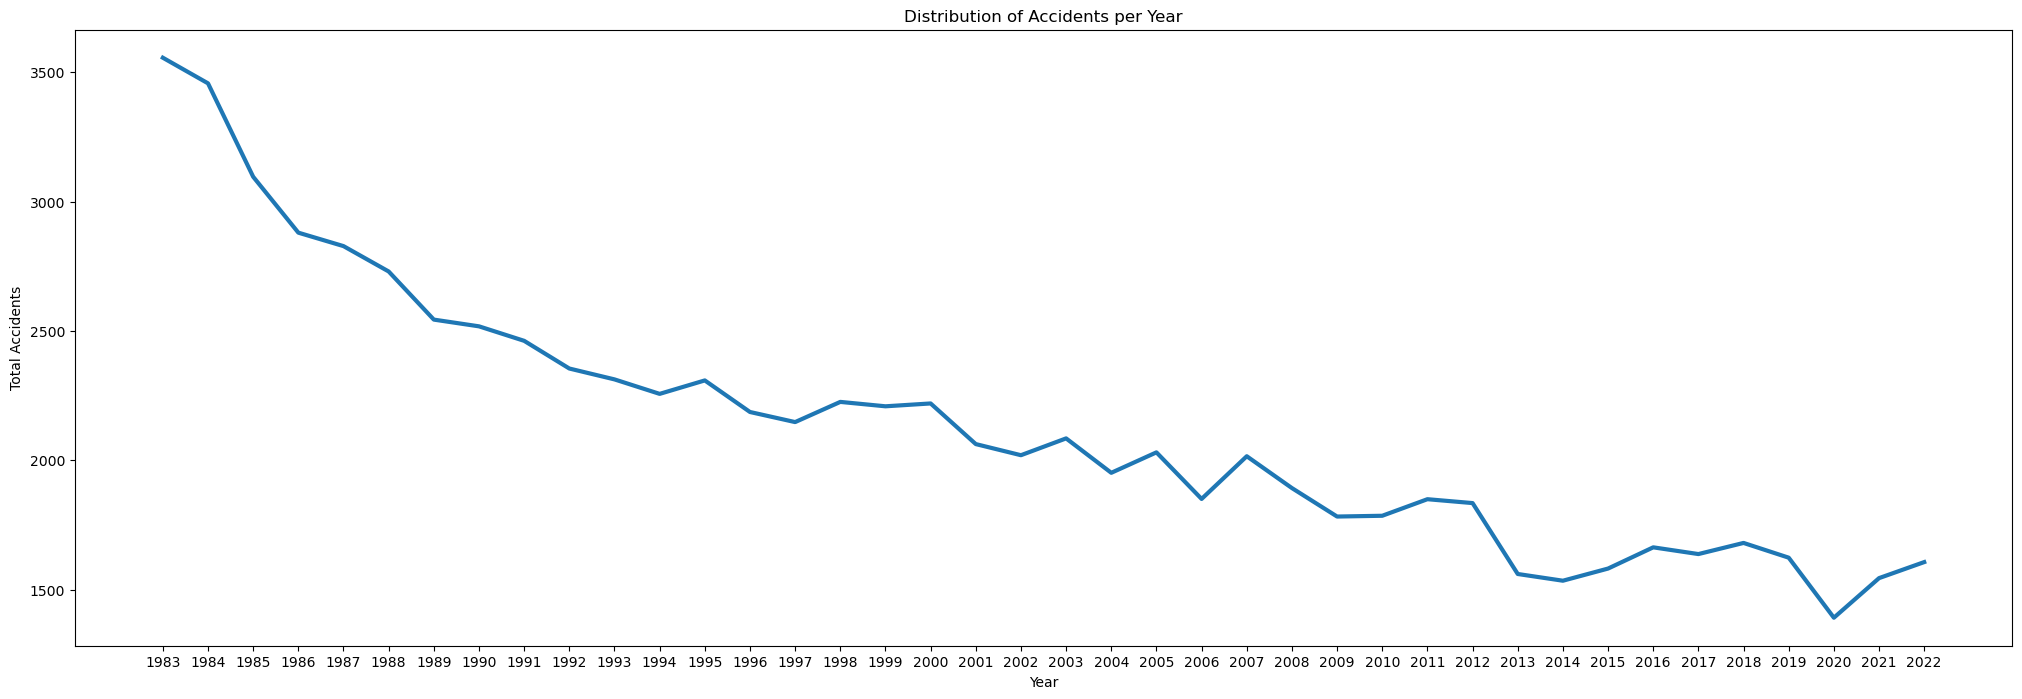

In [178]:
plt.figure(figsize= (25,8))
plt.plot(years_index,years_values,linewidth = 3)
plt.title('Distribution of Accidents per Year')
plt.ylabel('Total Accidents')
plt.xlabel('Year')

In [179]:
#add column Year to df_analysis

Year = pd.Series(df_analysis['Event.Date'].str.split('-').map(lambda x: x[0]),name="Year")

In [180]:
#adds Year to df_analysis
df_analysis=df_analysis.join(Year,how='outer')

### Aircraft Damage

The pie chart below shows the extent of the damage to the aircraft with only 2.8% with minor damage, 75.6% having substantial damage and 21.6% being completely destroyed. This tells us that when airplanes do crash the chances of the aircraft remaining wholey intact are slim and this poses a great risk to the passengers and crew onboard.

Text(0.5, 1.0, 'Aircraft Damage')

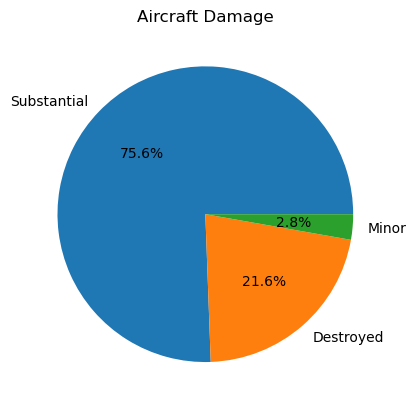

In [192]:
#pie chart of Aircraft Damage
plt.pie(list(df_analysis['Aircraft.damage'].value_counts().values),labels=list(df_analysis['Aircraft.damage'].value_counts().index),autopct='%1.1f%%')
plt.title('Aircraft Damage')


### Models involved in the most Accidents

In [182]:
make_model_an = df_analysis['Make'] + ' ' + df_analysis['Model'] #create new make and model series
make_model_an = pd.Series(make_model_an,name= 'Make.and.Model') #add column name to series

In [183]:
df_analysis=df_analysis.join(make_model_an,how='outer').drop(['Make','Model'],axis=1) #add new series to dataframe

In [184]:
top_15 = df_analysis['Make.and.Model'].value_counts().head(15) #call top 15 aircraft involved in accidents

Text(0, 0.5, 'Total Accidents')

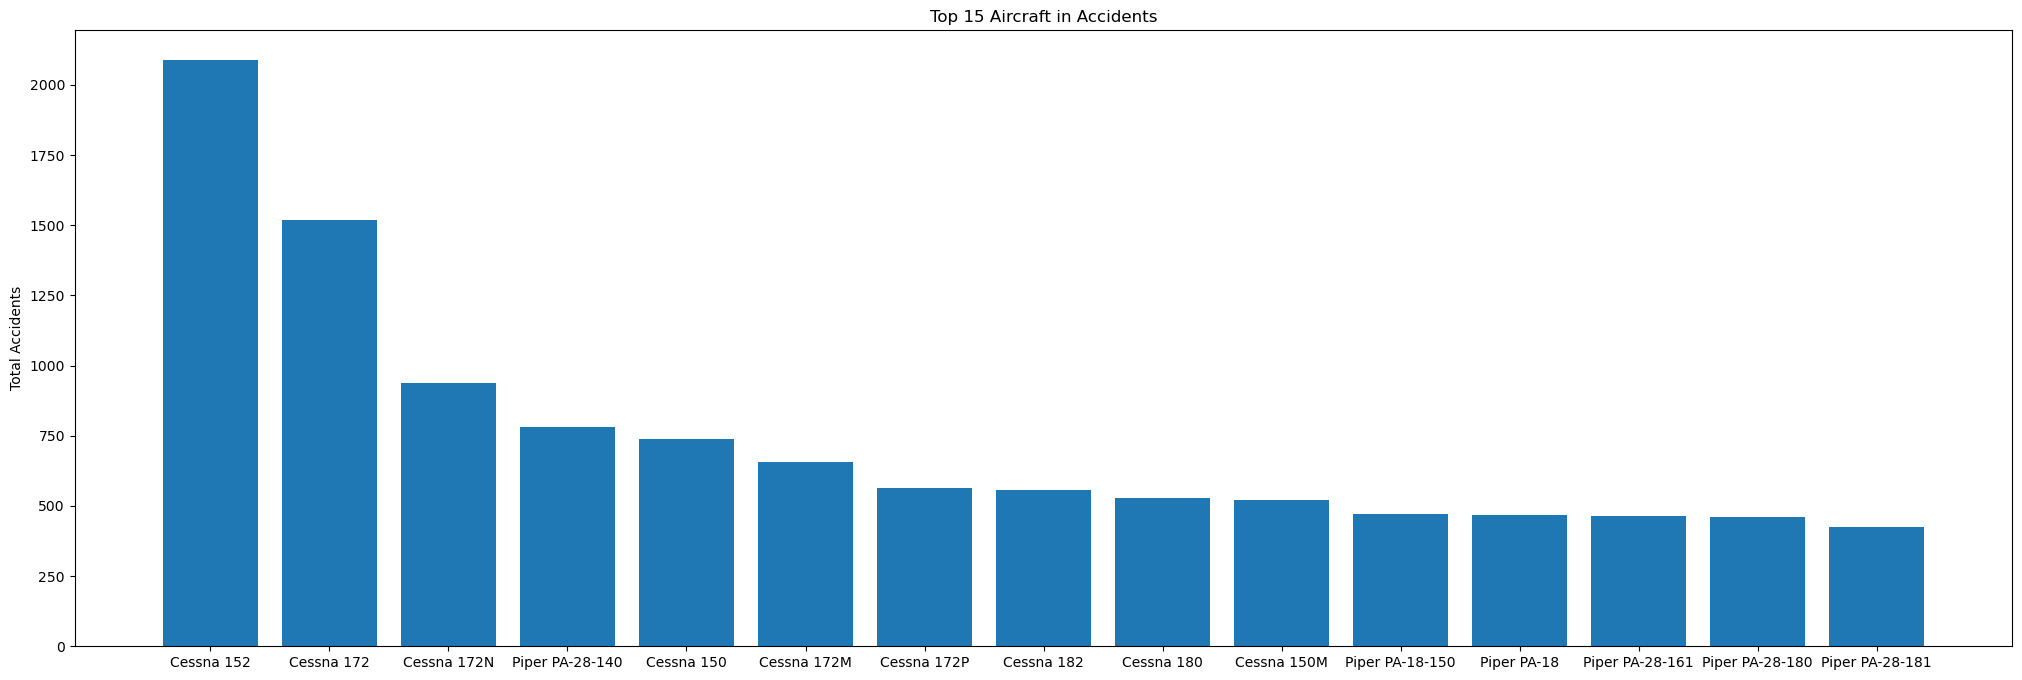

In [185]:
plt.figure(figsize=(25,8))
plt.bar(list(top_15.index),top_15)
plt.title('Top 15 Aircraft in Accidents')
plt.ylabel('Total Accidents')

These are the aircraft with the highest total accidents from 1962 to 2023. Cessna and Piper airplanes seem to be involved in the majority of crashes with Cessna 152 at the top.

### Distribution of Casualties to Aircraft size (Number of Engines)

Plots of injury occurences of varying severity compared to engine size

Text(0, 0.5, 'Total Minor Injuries')

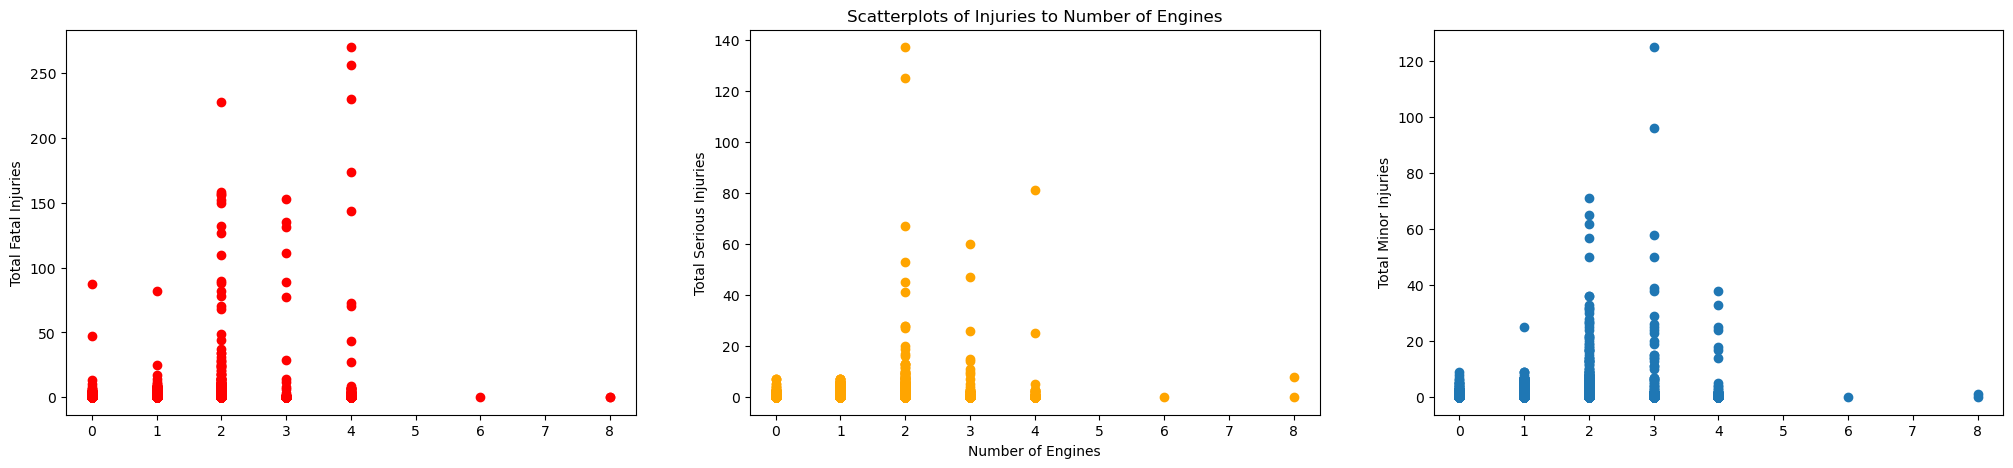

In [194]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize= (25,5))
#scatter plots
ax1.scatter(df_analysis['Number.of.Engines'],df_analysis['Total.Fatal.Injuries'],color='red')
ax1.set_ylabel('Total Fatal Injuries')

ax2.scatter(df_analysis['Number.of.Engines'],df_analysis['Total.Serious.Injuries'],color='orange')
ax2.set_title('Scatterplots of Injuries to Number of Engines')
ax2.set_ylabel('Total Serious Injuries')
ax2.set_xlabel('Number of Engines')

ax3.scatter(df_analysis['Number.of.Engines'],df_analysis['Total.Minor.Injuries'])
ax3.set_ylabel('Total Minor Injuries')



From this we gather that there are more casualties in planes with 2 to 4 engines, although there is a significant no. of casualties in accidents where the aircraft had 1 or no engine. This indicates that a reasonable amount of these accidents were in small aircraft likely to be privately owned or recreational. 


### Purpose of Flight analysis

In [187]:
purpose_of_flight = df_analysis['Purpose.of.flight'].value_counts().head(15).index
purpose_of_flight_count = df_analysis['Purpose.of.flight'].value_counts().head(15)

Text(0, 0.5, 'Frequency')

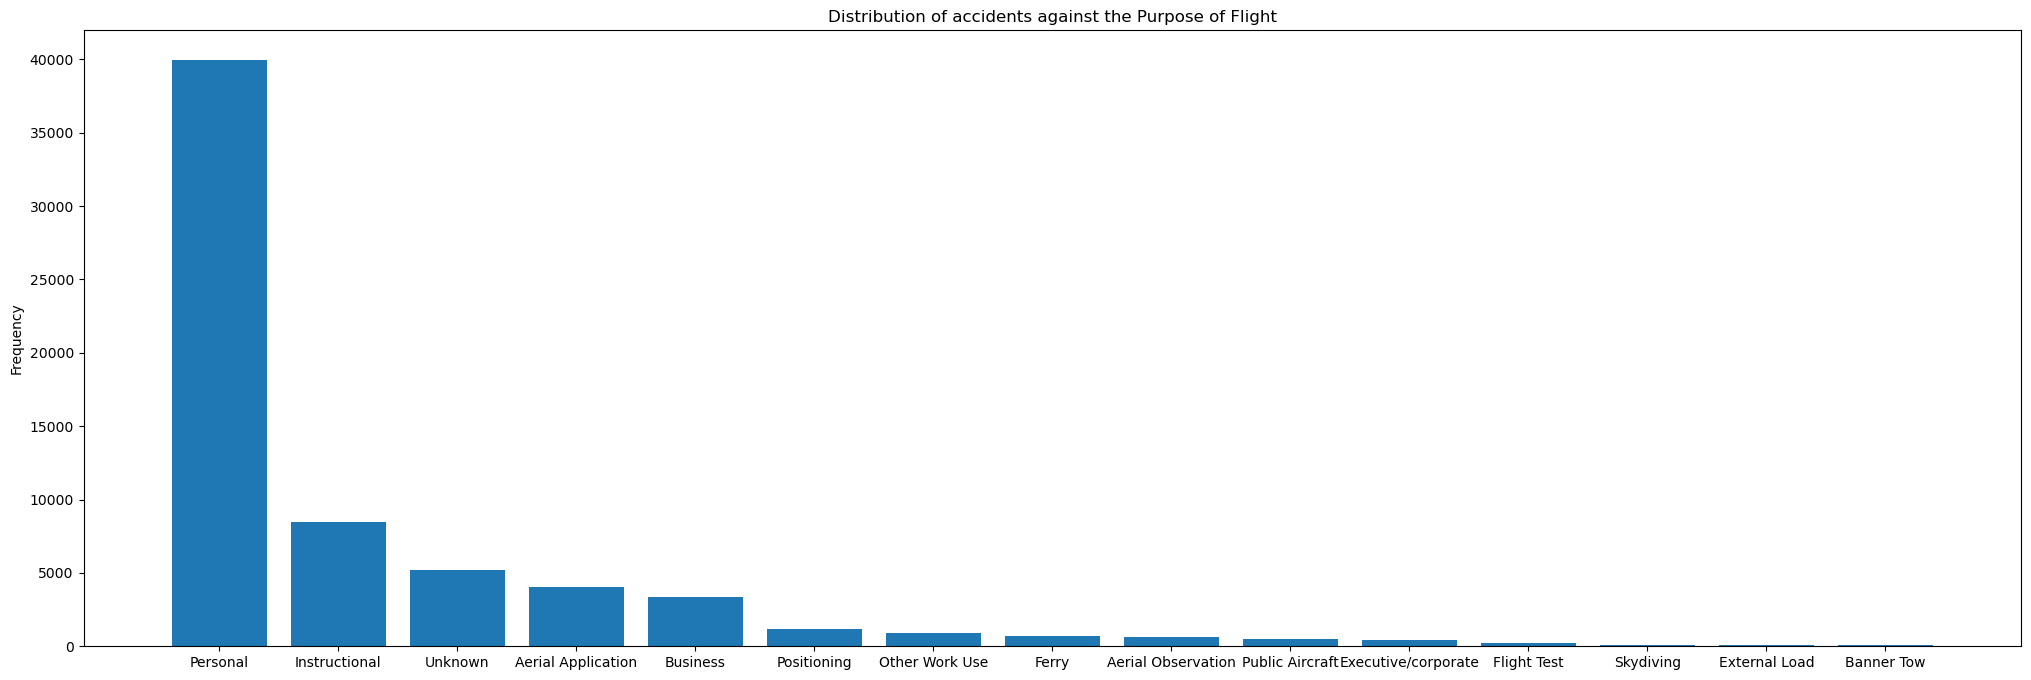

In [188]:
plt.figure(figsize=(25,8))
plt.bar(purpose_of_flight,purpose_of_flight_count)
plt.title('Distribution of Purpose of Flight against total accidents')
plt.ylabel('Frequency')

This bar plot shows most of the accidents occured in aircraft that were used for personal purposes followed by instructional purposes. There are a moderate number of crashes in flights used for Business and Aerial application, but the data seems to support that the majority of crashes happen with small aircraft that are used for private or instructional reasons.

### Weather Conditions

The bar plots below describe the total number of crashes by different aircraft models when the pilots had to rely on their instruments due to bad weather and when they had clearer weather conditions respectively.

Text(0, 0.5, 'Frequency')

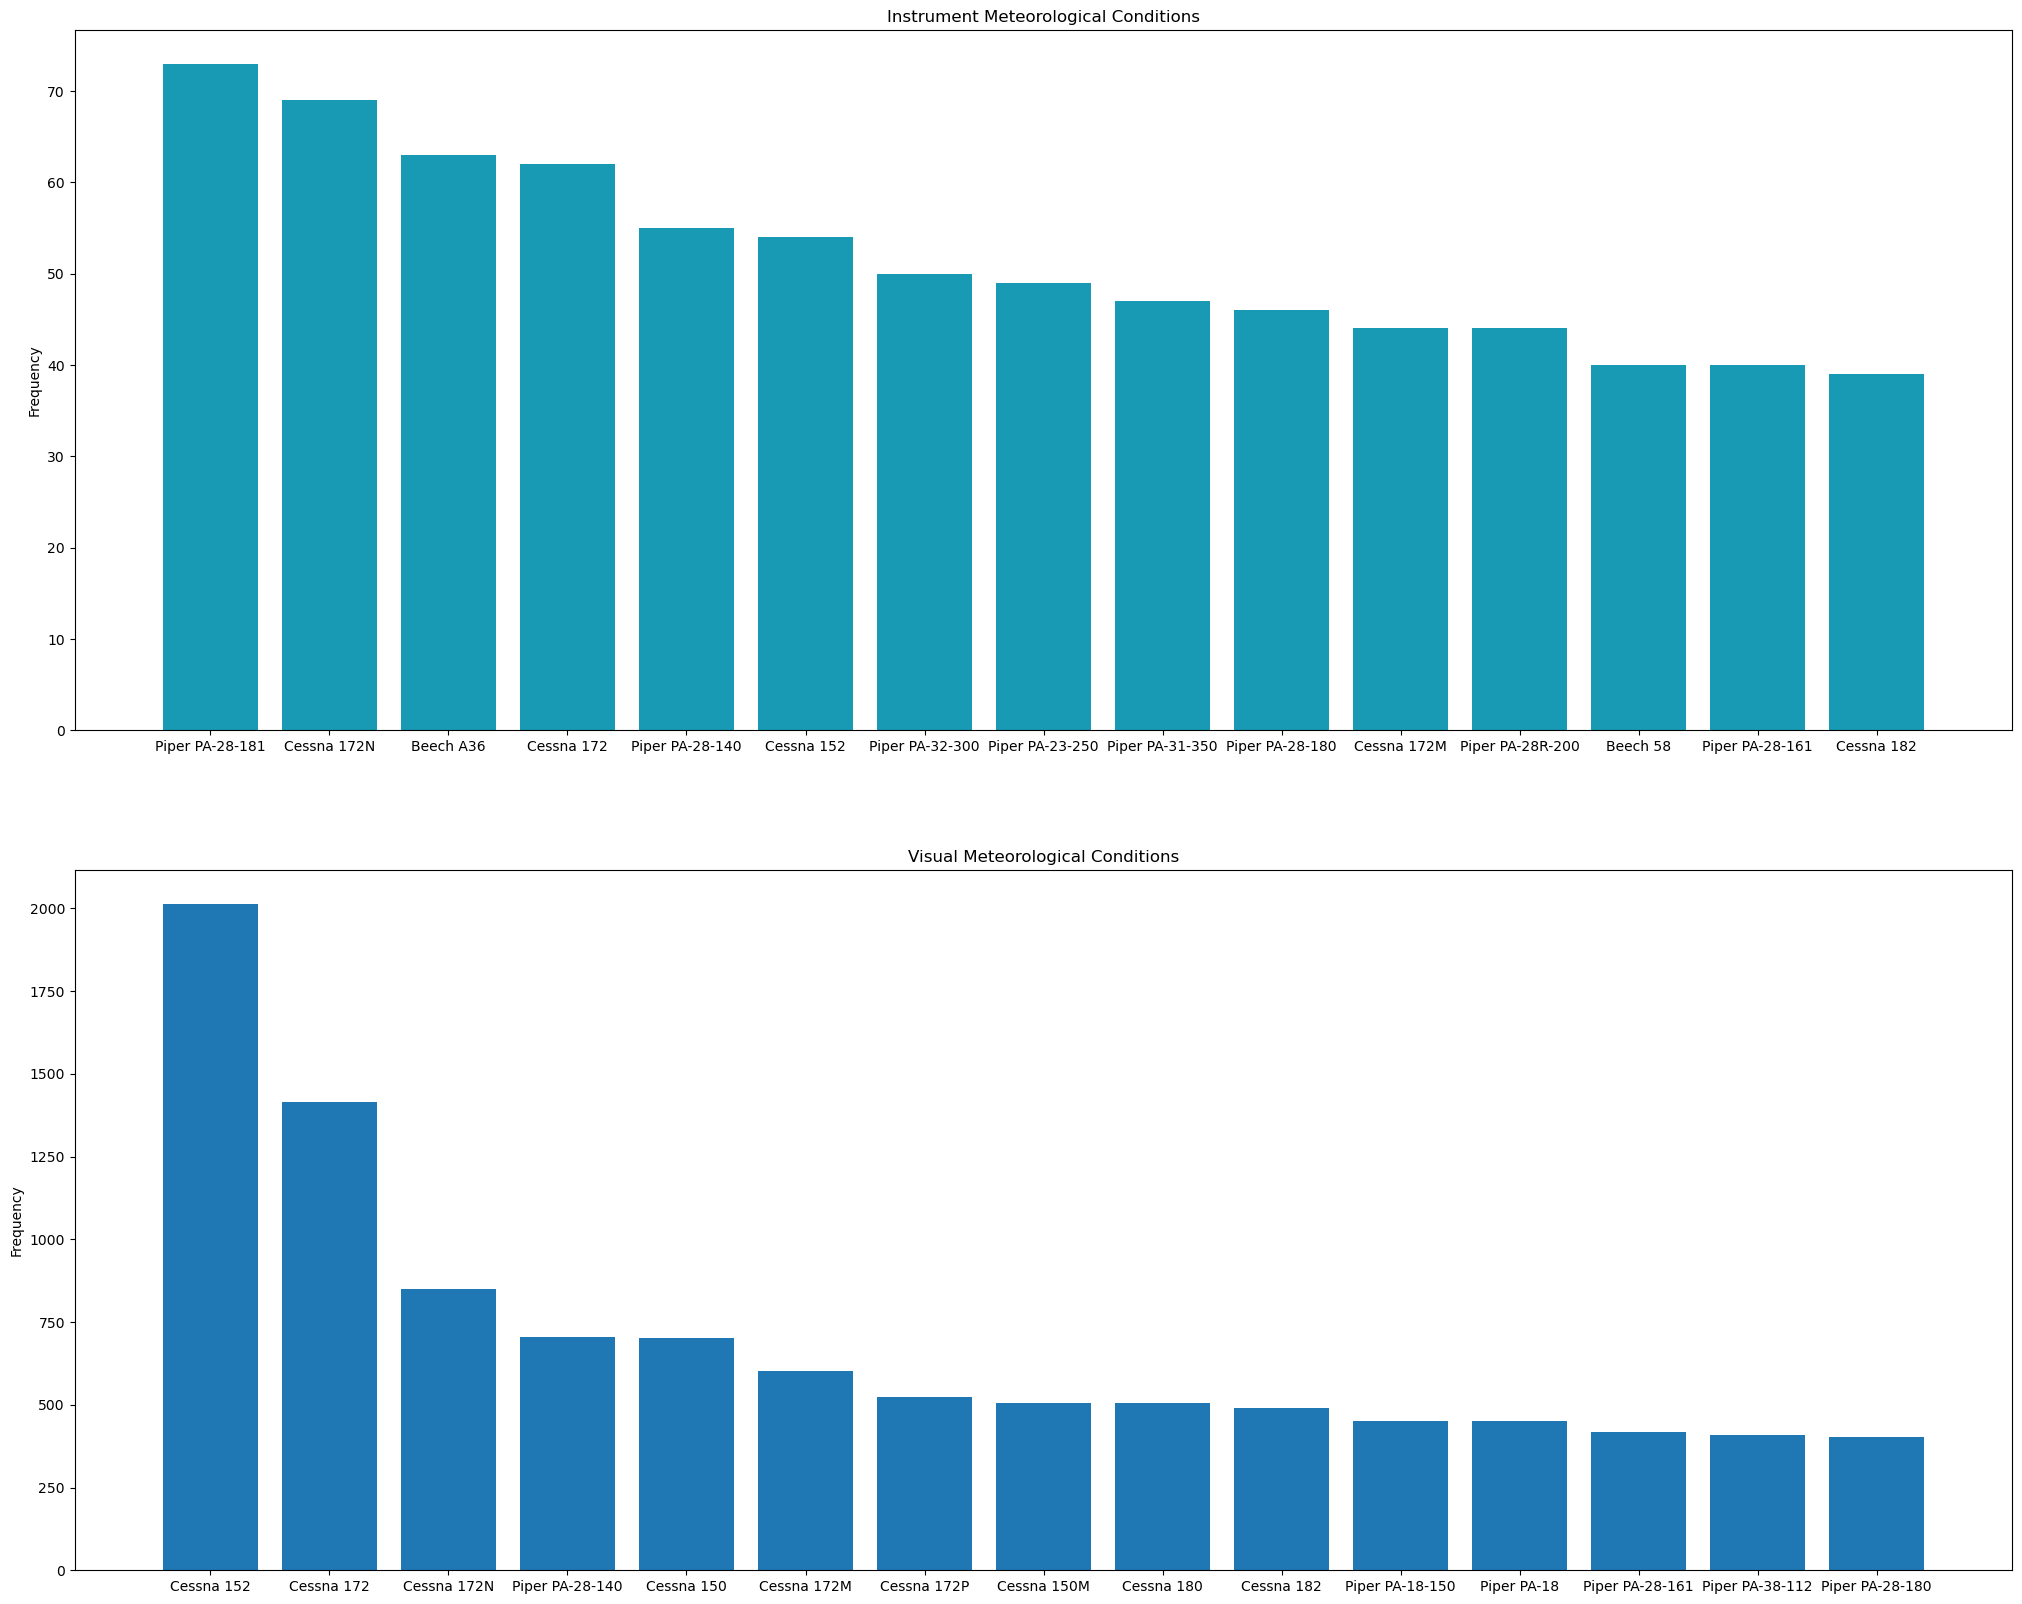

In [202]:
Weather_data=df_analysis.groupby(['Weather.Condition','Make.and.Model']).count()['Event.Date'].sort_values(ascending=False)
fig ,(ax1,ax2) = plt.subplots(2,1,figsize=(25,20))
ax1.bar(Weather_data['IMC'].head(15).index,Weather_data['IMC'].head(15).values,color='#189ab4')
ax1.set_title('Instrument Meteorological Conditions')
ax1.set_ylabel('Frequency')
ax2.bar(Weather_data['VMC'].head(15).index,Weather_data['VMC'].head(15).values)
ax2.set_title('Visual Meteorological Conditions')
ax2.set_ylabel('Frequency')

The plots show there is a higher frequency of smaller aircraft accidents in conditions with high and low visibility, although there is a larger number of crashes when there is low visibility and pilots need to rely on instruments.

## Conclusion
Using data from the National Transportion Safety Board (NTSB), we have explored records of accidents from 1962-2023. The records reveal interesting yet intuitive information about the frequency of airplane incidents and crashes.

* From the distribution of accidents per Year we can see a clear downward trend which indicates airplanes have been getting progressively safer.

* The Aircraft Damage Pie chart shows us that 75.6% of aircraft that crash experience substantial damage, 21.6% are completely destroyed and 2.8 experience minor damage. From this we can infer that when airplanes crash there is significant chance of total loss of life and high chance of the people onboard getting injured.

* From the Models with the most crashes bar plot we can see two main manufacturers are leading in the total accidents.
Although Cessna and Piper aircraft are involved in the majority of incidents, it is worth mentioning that Cessna 152 and 172 are popular aircraft models used in training novice pilots and this factors into the high frequency of crashes.

* When looking at the relationship between the Injuries to the Number of Engines, we see that the majority of Fatalities,Severe Injuries and Minor Injuries occur in aircraft with 2-4 engines. Aircraft with 1 engine may be responsible for the most crashes but the larger aircraft pose a great risk of fatalities if and when they do crash.

* As seen from the distribution of Purpose of Flights, there is a significant number of airplanes that were used for business and aerial application purposes that crashed. The majority of accidents occured when the aircraft where used for personal and instructional purposes, this coincides with the fact that most of the airplane models that crashed were smaller planes i.e Cessna 152, 172, 152N, 150, Piper PA-28-140, PA-18-150 PA-28-161 e.t.c

* The weather conditions bar plots shows there is a higher frequency of smaller aircraft accidents in conditions with high and low visibility, this may also be attributed to smaller aircraft are more subject to changes in weather even though there may still be other underlying factors that could lead to a crash.

Based on these findings an assumption could be made, that when purchasing aircraft it would be prudent to pursue medium to larger aircraft as there are relatively fewer incidents where they crash and also ensuring the pilots and crew are well trained would help mitigate the risk of heavy casualties in any instance where accidents may occur.